In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data=pd.read_csv('Cardiotocographic.csv')

In [3]:
data.head(5)

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [4]:
data.shape

(2126, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


# 1 Data Clearning and Preparations

In [6]:
# first lets handel missing values 
data.isnull().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [7]:
for col in data.columns:
    if data[col].dtype in ['int64','float64']:
        data[col].fillna(data[col].median(),inplace=True)

In [8]:
# droping missing values insted of drop we can also fill with central tendency
data=data.dropna()

In [9]:
data.isnull().sum()

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

In [10]:
# checking every columns unique values 
unique_values = {col: data[col].unique() for col in data.columns}

for column, values in unique_values.items():
    print(f"Unique values in '{column}': {values}")

Unique values in 'LB': [120.         132.         133.         134.         131.94823162
 122.         151.         150.         131.         130.
 129.         128.         124.         115.         114.
 116.         158.         156.         147.81657385 149.
 146.         148.         144.         142.         136.
 141.         138.         140.         154.         145.
 144.93508565 139.         125.         123.         159.
 158.75766557  52.         143.         148.96141613 119.
 118.9736874  121.         137.8325398  123.78909453 127.
 128.84390776 125.14358925 124.62776778 123.3350051  125.80994939
 126.         118.         135.         144.34576434 146.00059107
 137.         134.72723786 133.28233138 137.82451993 140.52416935
 149.95442235 147.         214.         136.66065106 125.12265281
 151.17863367 157.         156.86235589 128.3759678  143.45812176
 142.11653388 143.94636332 136.14298944 122.64579013 123.15993089
 140.09077045 130.03041758 130.11851905 131.9871979

#### there is no inconsistencices in data type even there are many unique values in dataset 

# STATISTICAL SUMMARY


In [11]:
data.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.340204,0.003204,0.009894,0.004391,0.001895,0.000002,0.000173,46.995984,1.364378,10.285964,8.276147,70.395387,0.313246,1.301499
std,11.214379,0.004373,0.067540,0.003340,0.003343,0.000141,0.000836,18.813973,1.173632,21.205041,7.734851,42.720508,0.643186,0.642133
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,-1.025988
25%,126.000000,0.000000,0.000000,0.001851,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.000000
50%,133.000000,0.001634,0.000000,0.004484,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.400000,67.000000,0.000000,1.000000
75%,140.000000,0.005606,0.002567,0.006536,0.003289,0.000000,0.000000,61.000000,1.700000,11.000000,10.800000,100.000000,1.000000,1.000000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000,357.000000,3.000000,5.000000


In [12]:
# HIGHLIGHT THE SUMMARY

In [13]:
# standard deviations of ALTV,ASTV,MLTV are HIGH VARIABILITY
# 

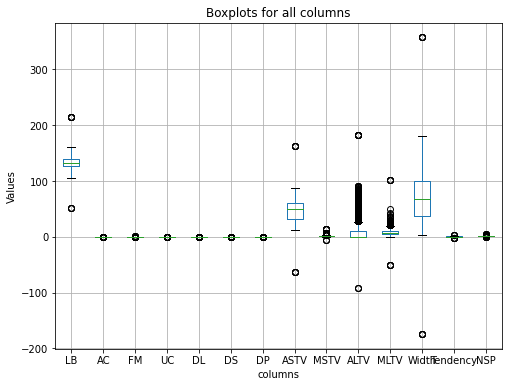

In [21]:
# OUTLIEAR CHECK


data.boxplot(figsize=(8,6),grid=True)
plt.title("Boxplots for all columns")
plt.ylabel("Values")
plt.xlabel("columns")
plt.show()

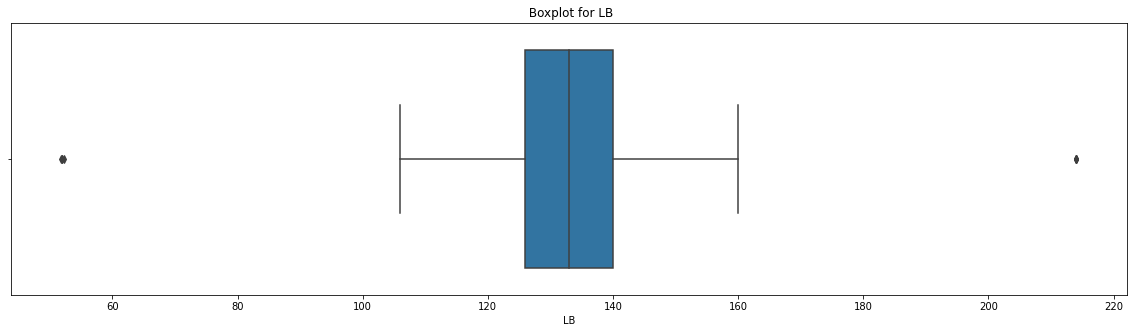

In [29]:
# analyzing the separate box plot and eliminating the outliears
plt.figure(figsize=(20,5))
sns.boxplot(x=data['LB'])
plt.title(" Boxplot for LB")
plt.show()

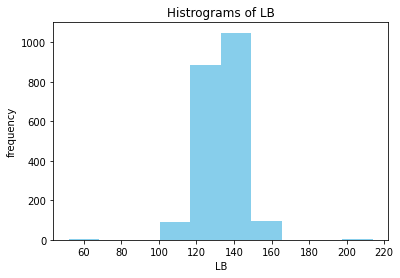

In [33]:
# before eliminating outlinear we should check the  data distribution 
# If data is in bell curve then can be use the IQR methods or if not in the normal distribution then can be used z-score 
plt.hist(data['LB'],color="skyblue")
plt.title("Histrograms of LB")
plt.xlabel("LB")
plt.ylabel("frequency")
plt.show()

In [57]:
# creating function for eliminating all the outliears
def eliminate_outliear(df):
    data_no_outliear=data.copy()
    for col in data.columns:
        if data[col].dtype in ["float64","int64"]:
            Q1=data[column].quantile(0.25)# 25 percent of the data
            Q3=data[column].quantile(0.75) # 75 percent of the data
            IQR=Q3-Q1
            lower_bound=Q1-1.5*IQR
            upper_bound=Q3-1.5*IQR
            data[(data[column]>= lower_bound) & (data[column]<= upper_bound)]
    return data_no_outliear

In [58]:
data_clean=eliminate_outliear(data)

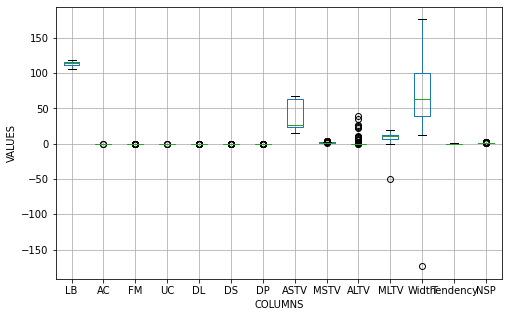

In [60]:
data_clean.boxplot(figsize=(8,5),grid=True)
plt.xlabel("COLUMNS")
plt.ylabel("VALUES")
plt.show()

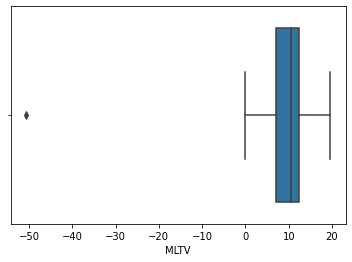

In [62]:
sns.boxplot(x=data["MLTV"])
plt.show()

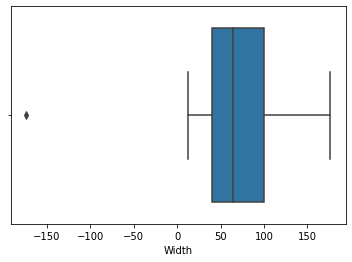

In [63]:
sns.boxplot(x=data["Width"])
plt.show()

In [118]:
# removing the multiple outliears at onces by usng the IQR methods
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  # 25th percentile
    Q3 = df[column].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile Range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

data_no=remove_outliers_iqr(data,"MLTV")

In [83]:
data_no

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
36,115.000000,0.005004,0.079233,0.005004,0.002502,0.000000,0.000000,23.0,3.400000,0.0,18.690309,130.000000,0.0,1.0
37,114.000000,0.004559,0.000000,0.004559,0.003040,0.000000,0.000000,24.0,3.200000,0.0,16.200000,134.000000,0.0,1.0
38,115.000000,0.006242,0.064919,0.003745,0.001248,0.000004,0.000000,22.0,3.600000,0.0,19.600000,138.000000,0.0,1.0
39,115.000000,0.009109,0.054656,0.005061,0.000000,0.000000,0.000000,27.0,2.300000,0.0,12.400000,129.000000,0.0,1.0
40,114.000000,0.008340,0.057548,0.006672,0.000834,0.000000,0.000000,28.0,2.200000,0.0,12.200000,98.000000,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,110.000000,0.003215,0.001608,0.006431,0.007235,0.000000,0.001608,68.0,3.100000,0.0,-0.200788,133.000000,-1.0,3.0
1683,110.000000,0.003466,0.001733,0.006932,0.006932,0.000000,0.001733,68.0,3.000000,0.0,0.000000,133.000000,-1.0,3.0
1684,110.000000,0.001706,0.003413,0.001706,0.008532,0.000000,0.001706,68.0,3.200000,0.0,0.000000,124.000000,-1.0,3.0
1685,110.000000,0.004129,0.002073,0.005181,0.008290,0.000000,0.001036,67.0,3.300146,0.0,0.000000,130.000000,-1.0,3.0


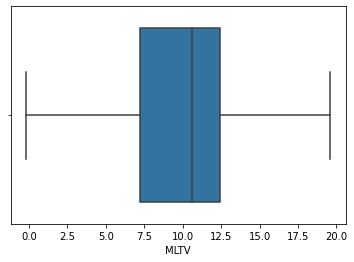

In [84]:
sns.boxplot(x=data_no["MLTV"])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

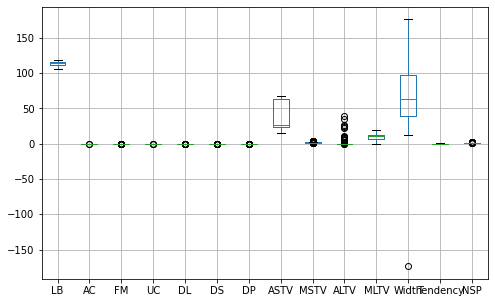

In [86]:
data_no.boxplot(figsize=(8,5),grid=True)
plt.show

In [89]:
clean=remove_outliers_iqr(data_no,"Width")

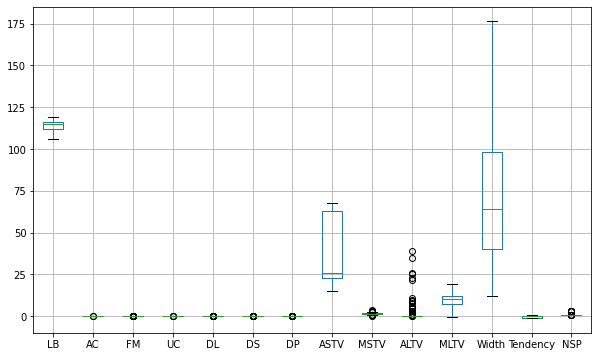

In [90]:
clean.boxplot(figsize=(10,6),grid=True)
plt.show()

### Each of the outliear are eliminated and it can be used further

# 3.	Data Visualization:

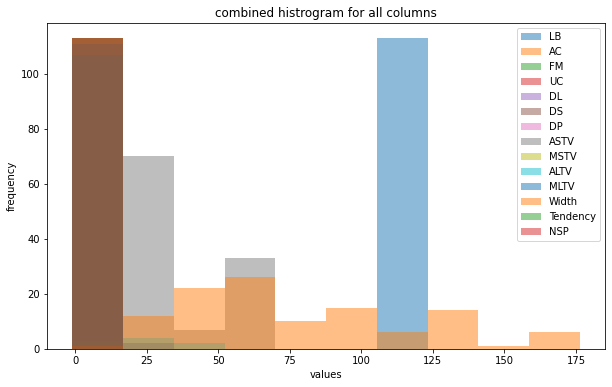

In [97]:
#combined histrograph  
clean.plot.hist(alpha=0.5,figsize=(10,6),bins=10)
plt.title("combined histrogram for all columns")
plt.xlabel("values")
plt.ylabel("frequency")
plt.show()

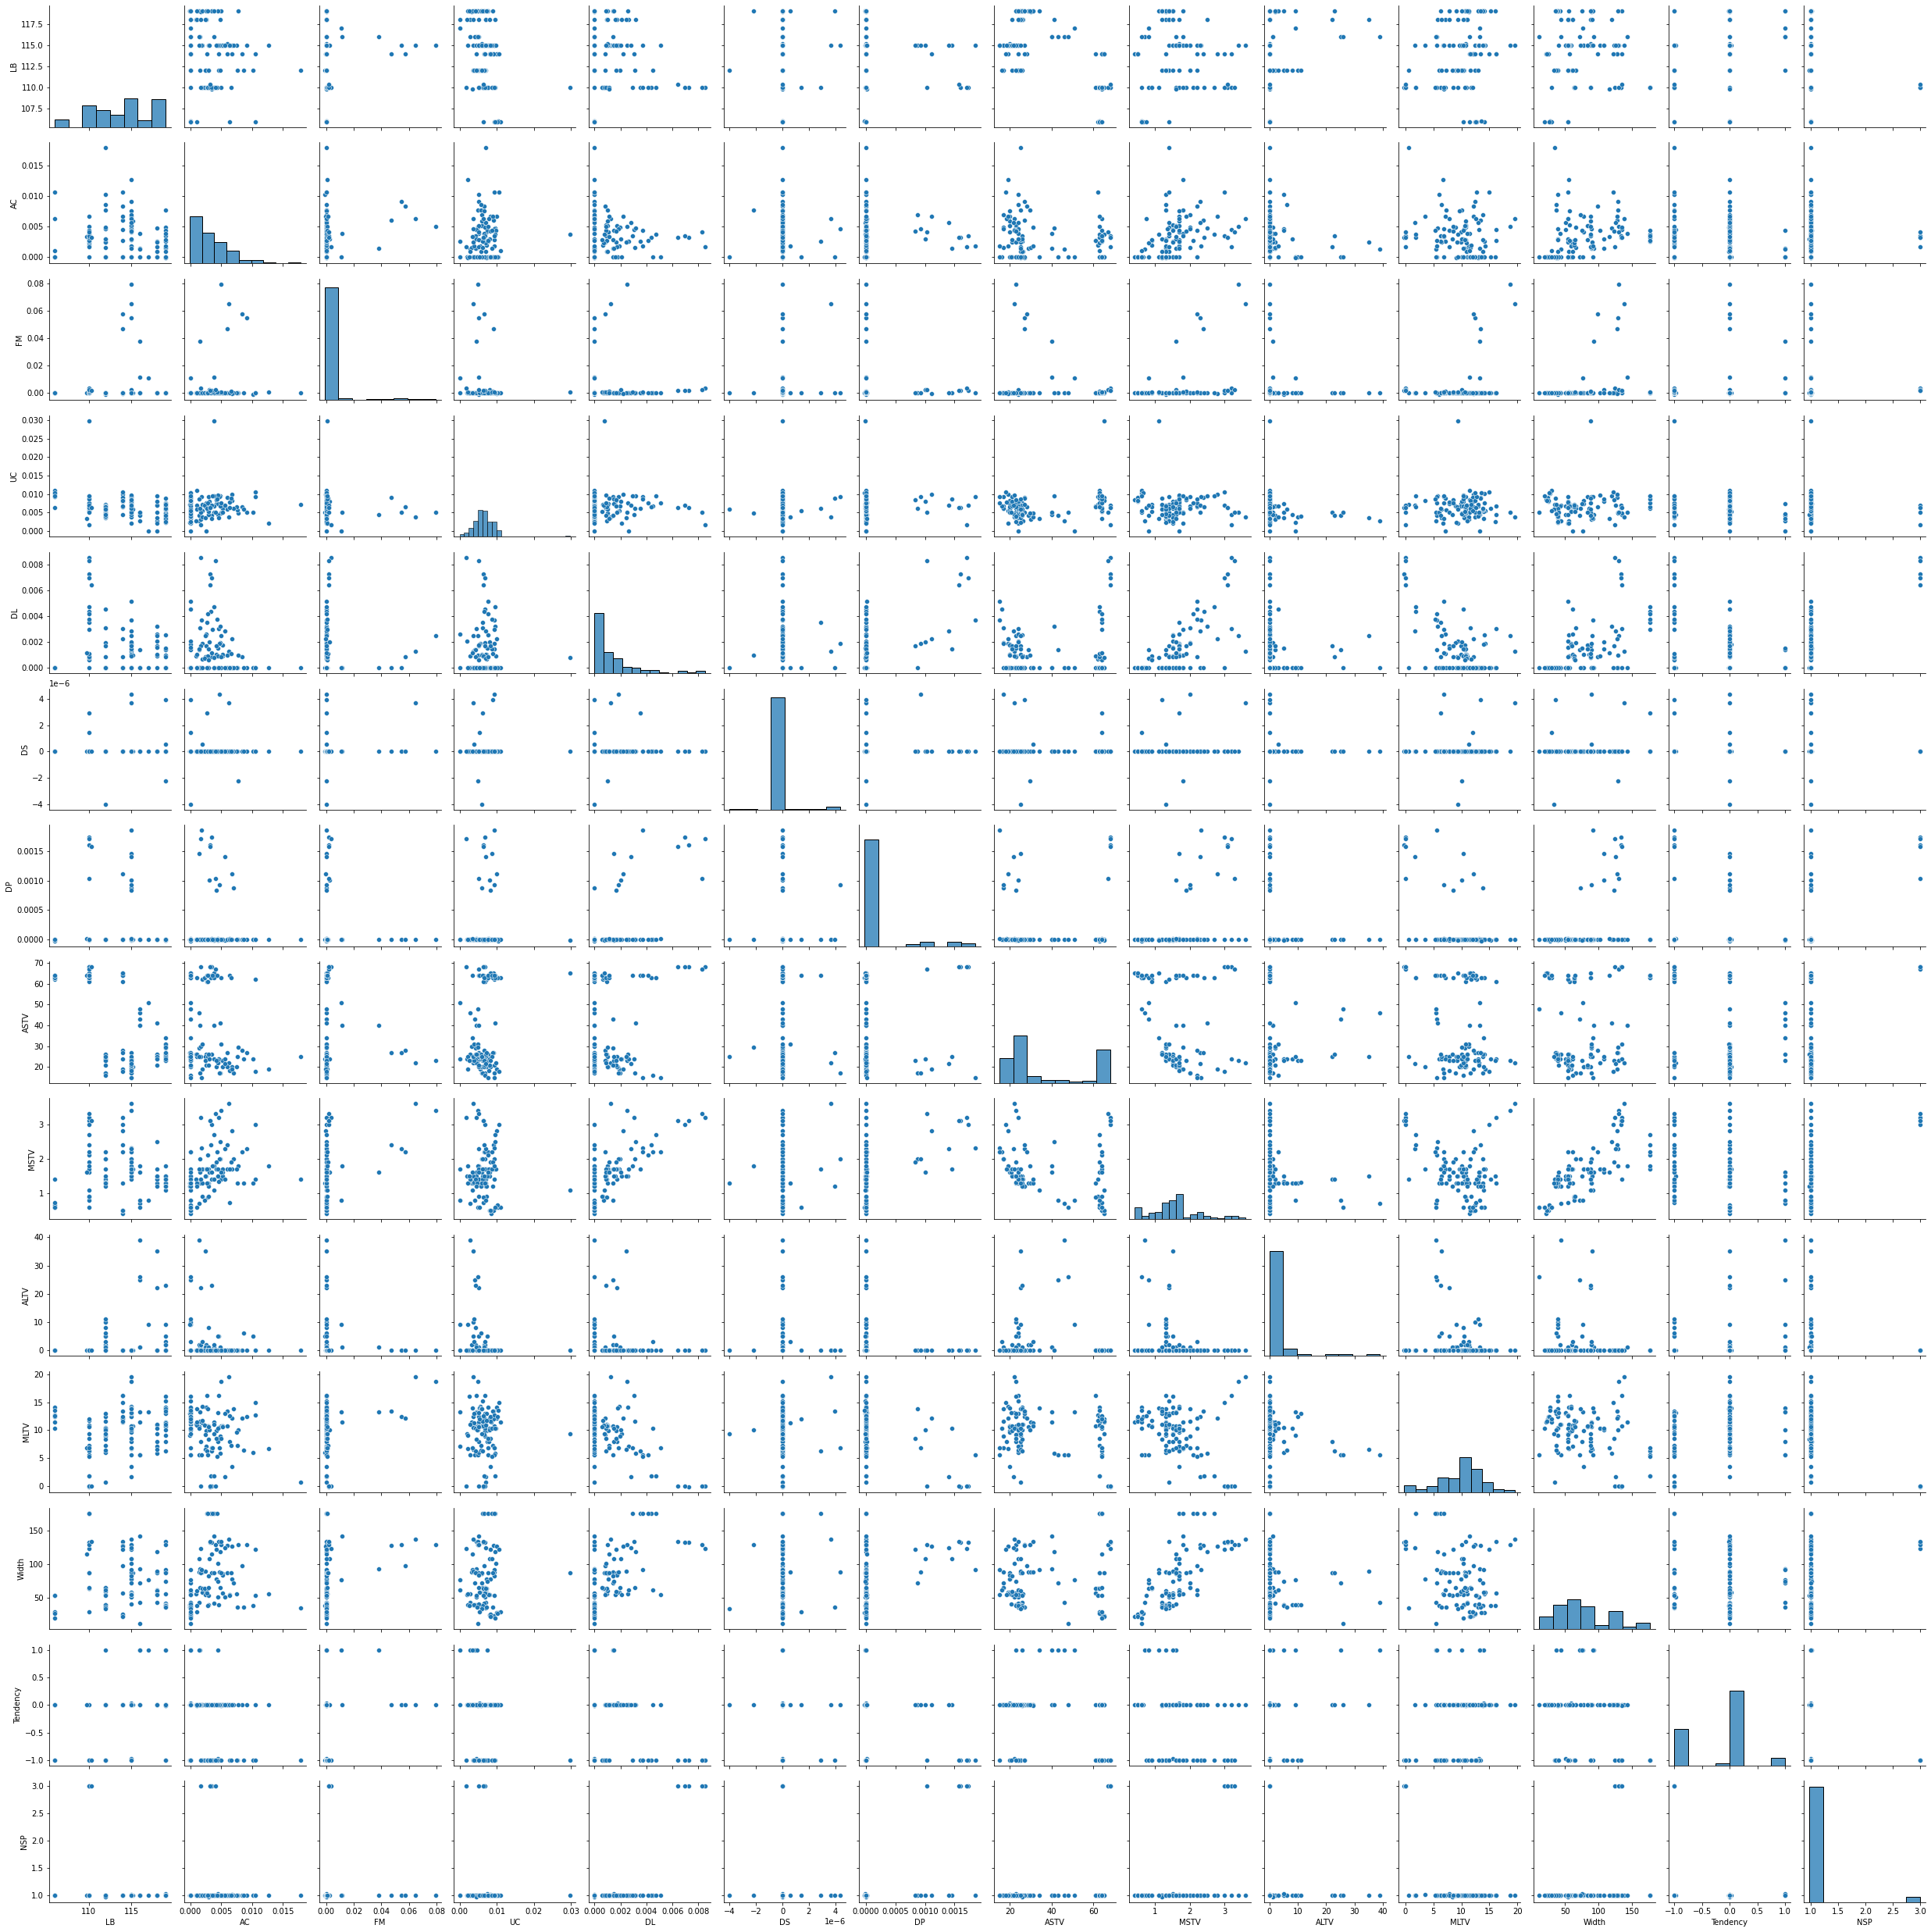

In [100]:
# scatter plot  for all the  columns 
sns.pairplot(clean)
plt.show()

In [103]:
# correlation heatmaps 
z=clean.corr()

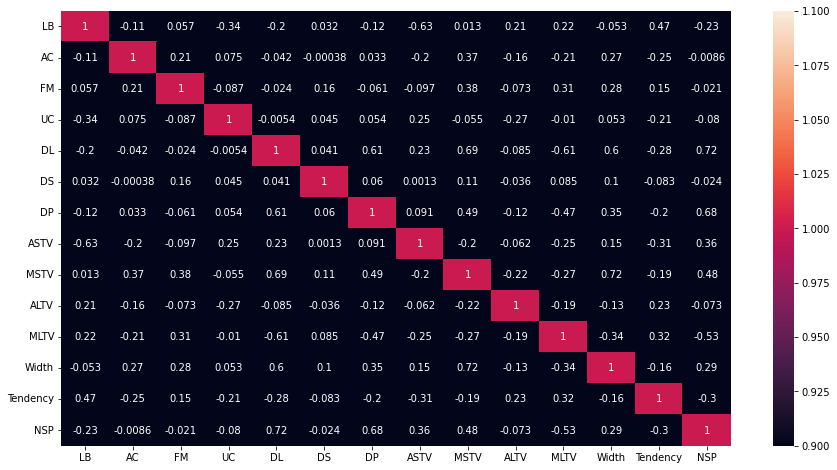

In [108]:
plt.figure(figsize=(15,8))
sns.heatmap(z,annot=True,vmin=1,vmax=1)
plt.show()

In [110]:
# voilinplot is usend when we have the categorical 

# Pattern Recoginition and insights
# Correlation Coefficients


In [111]:
# pearsom correlation 
# it measur the linear relationship between two continous variable the coefficent range from -1 to 1
correlation_matrix=clean.corr()
# +1 perfefct positive linear correlation(directly proportional)
# 0 no linear correaltion
# -1 perfect negative linear correaltion (if the variable incress ,the outher decress)
print(correlation_matrix)

                LB        AC        FM        UC        DL        DS  \
LB        1.000000 -0.110403  0.056650 -0.337980 -0.198118  0.031849   
AC       -0.110403  1.000000  0.207593  0.074840 -0.042283 -0.000381   
FM        0.056650  0.207593  1.000000 -0.087064 -0.024337  0.163087   
UC       -0.337980  0.074840 -0.087064  1.000000 -0.005439  0.044923   
DL       -0.198118 -0.042283 -0.024337 -0.005439  1.000000  0.041334   
DS        0.031849 -0.000381  0.163087  0.044923  0.041334  1.000000   
DP       -0.116544  0.033354 -0.061244  0.053974  0.611925  0.059783   
ASTV     -0.626574 -0.197046 -0.096875  0.251869  0.230966  0.001287   
MSTV      0.013303  0.372262  0.384540 -0.054899  0.694080  0.107334   
ALTV      0.212911 -0.156841 -0.072914 -0.266254 -0.085253 -0.036001   
MLTV      0.218121 -0.205943  0.314530 -0.010035 -0.607558  0.085026   
Width    -0.053084  0.274218  0.279035  0.053345  0.596606  0.104650   
Tendency  0.468397 -0.245635  0.153810 -0.205609 -0.284935 -0.08

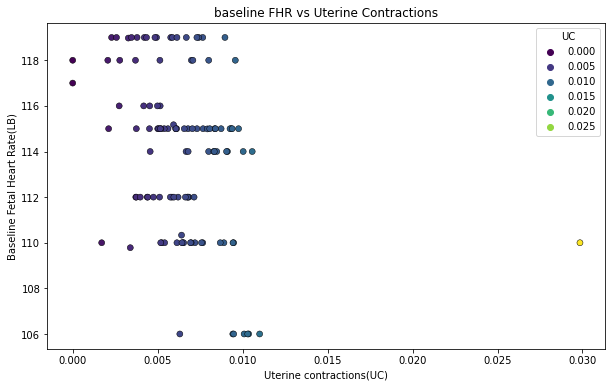

In [117]:
# scatter plot to investigate the relatioship with two variable
plt.figure(figsize=(10,6))
sns.scatterplot(x=clean['UC'],y=clean["LB"],hue=clean['UC'],palette="viridis",edgecolor="black")
plt.title("baseline FHR vs Uterine Contractions")
plt.xlabel("Uterine contractions(UC)")
plt.ylabel("Baseline Fetal Heart Rate(LB)")
plt.show()

In [119]:
# there is no time columns so that couldnt find the patterns over temploral data

5.	Conclusion:
●	Summarize the key insights and patterns discovered through your exploratory analysis.
●	Discuss how these findings could impact decision-making or further analyses


# Conclusion 

1: Correlation  
        Baseline FHR(LB) vs Uterine Contraction(UC):
              if a weak correlation(eg. near0.005-0.010)exists, it suggest minimal direct influence of contractions on                   baseline FHR
              impact: the absence of strong realtionship might indicates that other factores such as placental function                 or maternal condition, could be playing a larger role in fetal heart 
               
       FETAL MOVEMMTS(FM) AND ACCELERATIONS(AC):
              A strong positive correlation would confirm feteal well being since movements typically lead to                           accelerations 
              Impact: Lack of this correlation might indicate poor responsiveness and could suggest the nee for further                 asessment of featl health
           
2: VARIABLITY ANALYSIS
        Normal vs Abnormal variabilty:
          ASTV(percentage of time with abnormal short term variability) and ALTV(abnormal ong term varibility) are                   crutical 
             Insight: A high percentage of abnormal variability suggests compromised fetal health pssible due to                         hupoxia or other distress 
             Impact: Elevated ASTV or ALTV should trigger continuous monitiringand consideration of  immmediate medical                 interventions,especially during labor 
            
3: Clustering paterrn (group behavior)
         Cluster roups with in varibles like LB(FHR) ,UC, and FM could inidccate different population beahaviour 
              Isight: cluster might differentiate between normal and distressed fetal conditions
              Impact: Segmentatuin of these group could refine medicial Decisions,identifying high risk case needing                          immediate attention

# Decision impact 


1: High ASTV/ALTV or frequent DL/DP:
        continuous monitoring with escaltions to intensive care if necessary
        Scheduling of immediate interventation for fetuses showing consistent distress patterbs
        
        
        
2: Resource Allocation:
        Focus on figh risk cases identified through abnormal correaltions or clustering
        
3: Customming care protocols 
    Insights from variability and deceleations patterns can help in designing custom care rprotocols asuch as 
    ADjusting labour induction methods
    planning C-sections if prologed decelerations persist.

# Furthur analysis 


1: Classification
    we can build a classification model to predict fetal risk categories         based on these parameters
2: Threshold Analysis
    Identify the thresolds for ASTV,ALTC,DL and other critical parameters to     flag abnormal cases effecitively 
3: DecisionSupport 
    Develp a decision support system intergrating these findings to assis       clinicians in real time,enabling better interpretation of FHR and UC         relationships